## Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno as msno
from zipfile import ZipFile as zf
import random
#import sklearn.metrics       as Metrics

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Uploading data (input3)

zip_file = zf('/mnt/workstation/data/inputs3.zip')

df = pd.read_csv(zip_file.open("inputs3.csv"))#, sep= ",", names =header)
df

In [2]:
df = pd.read_csv("/mnt/workstation/data/inputs3.csv")#, sep= ",", names =header)
df

,Unnamed: 0,Unnamed: 0.1,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,...,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,0,0,201908.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,...,0.0,1.0,0.0,311715.5,C,0.0,NaN,1255032.0,NaN,232526.0
1,1,1,201909.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,...,0.0,1.0,0.0,311715.5,C,0.0,NaN,1255032.0,NaN,265900.0
2,2,2,201907.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,...,0.0,1.0,0.0,311306.0,C,0.0,NaN,1255032.0,NaN,243052.0
3,3,3,201903.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,...,0.0,1.0,0.0,311306.0,C,0.0,NaN,1172612.0,NaN,276014.0
4,4,4,201911.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,...,0.0,0.0,0.0,677516.0,C,0.0,NaN,1255032.0,NaN,418866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255243,19255243,20899846,201910.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,...,0.0,3.0,0.0,929800.0,C,0.0,NaN,NaN,NaN,25500.0
19255244,19255244,20899847,202002.0,2090044.0,19670629.0,53.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,...,0.0,3.0,0.0,41800.0,D,0.0,NaN,NaN,NaN,147900.0
19255245,19255245,20899848,201903.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,...,0.0,0.0,0.0,928500.0,B,0.0,NaN,NaN,NaN,777437.1
19255246,19255246,20899849,202001.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,...,0.0,3.0,0.0,41800.0,D,0.0,NaN,NaN,NaN,1131012.0


In [3]:
df = df.iloc[:,2:]
df.columns

Index(['periodo', 'id_cli', 'fecha_nacimiento', 'edad', 'genero',
       'estado_civil', 'nivel_academico', 'profesion', 'ocupacion',
       'tipo_vivienda', 'ult_actual', 'categoria', 'codigo_ciiu',
       'ind_mora_vigente', 'cartera_castigada', 'ciudad_residencia',
       'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
       'rechazo_credito', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'tenencia_tc', 'cuota_tc_bancolombia', 'tiene_consumo',
       'tiene_crediagil', 'nro_tot_cuentas', 'ctas_activas',
       'tiene_ctas_activas', 'ctas_embargadas', 'tiene_ctas_embargadas',
       'pension_fopep', 'cuota_cred_hipot', 'tiene_cred_hipo_1',
       'tiene_cred_hipo_2', 'mediana_nom3', 'mediana_pen3', 'ingreso_nompen',
       'cat_ingreso', 'ingreso_final', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'cuota_de_vivienda',
       'cuota_de_consumo', 'cuota

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19255248 entries, 0 to 19255247
Data columns (total 65 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   periodo                        float64
 1   id_cli                         float64
 2   fecha_nacimiento               float64
 3   edad                           float64
 4   genero                         object 
 5   estado_civil                   object 
 6   nivel_academico                object 
 7   profesion                      object 
 8   ocupacion                      object 
 9   tipo_vivienda                  object 
 10  ult_actual                     float64
 11  categoria                      int64  
 12  codigo_ciiu                    float64
 13  ind_mora_vigente               bool   
 14  cartera_castigada              bool   
 15  ciudad_residencia              object 
 16  departamento_residencia        object 
 17  ciudad_laboral                 object 
 18  

In [5]:
100*df.isnull().sum()/df.shape[0]

periodo                     0.000000
id_cli                      0.000000
fecha_nacimiento            0.000000
edad                        0.000000
genero                      0.000000
                             ...    
pol_centr_ext              14.714830
convenio_lib               86.021027
ingreso_nomina             73.559510
ingreso_segurida_social    72.267015
gasto_familiar              0.000000
Length: 65, dtype: float64

In [6]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [7]:
100*df[features_f].isnull().sum()/df.shape[0]

periodo                           0.000000
id_cli                            0.000000
fecha_nacimiento                  0.000000
edad                              0.000000
ult_actual                        0.000000
codigo_ciiu                       0.000000
mora_max                         30.470727
cant_moras_30_ult_12_meses       30.470727
cant_moras_60_ult_12_meses       30.470727
cant_moras_90_ult_12_meses       30.470727
cupo_total_tc                     0.000000
cuota_tc_bancolombia              0.000000
nro_tot_cuentas                   0.000914
ctas_activas                      0.000914
ctas_embargadas                   0.000914
cuota_cred_hipot                 99.978972
mediana_nom3                      0.000000
mediana_pen3                      0.000000
ingreso_nompen                    0.000000
ingreso_final                     0.742577
cant_mora_30_tdc_ult_3m_sf       15.709509
cant_mora_30_consum_ult_3m_sf    15.709509
cuota_de_vivienda                 0.000000
cuota_de_co

In [8]:
100*df[features_o].isnull().sum()/df.shape[0]

genero                      0.000000
estado_civil                0.000000
nivel_academico             0.000000
profesion                   0.000000
ocupacion                   0.000000
tipo_vivienda               0.000000
ciudad_residencia           0.000000
departamento_residencia     0.000000
ciudad_laboral              0.000000
departamento_laboral        0.000000
rechazo_credito             0.000000
cat_ingreso                59.970991
rep_calif_cred              0.000000
dtype: float64

In [9]:
100*df[features_i].isnull().sum()/df.shape[0]

categoria    0.0
dtype: float64

In [10]:
100*df[features_b].isnull().sum()/df.shape[0]

ind_mora_vigente         0.0
cartera_castigada        0.0
tenencia_tc              0.0
tiene_consumo            0.0
tiene_crediagil          0.0
tiene_ctas_activas       0.0
tiene_ctas_embargadas    0.0
pension_fopep            0.0
tiene_cred_hipo_1        0.0
tiene_cred_hipo_2        0.0
dtype: float64

# Numerical variables

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
periodo,19255248.0,2.019594e+05,4.968779e+01,2.019020e+05,2.019070e+05,2.020010e+05,2.020070e+05,2.020110e+05
id_cli,19255248.0,3.393917e+06,2.461785e+06,3.000000e+00,1.374000e+06,2.895966e+06,4.940005e+06,8.704800e+06
fecha_nacimiento,19255248.0,1.978353e+07,1.377617e+05,1.900053e+07,1.970031e+07,1.981111e+07,1.989072e+07,2.020092e+07
edad,19255248.0,4.114562e+01,1.378647e+01,0.000000e+00,3.000000e+01,3.800000e+01,5.000000e+01,1.200000e+02
ult_actual,19255248.0,2.019040e+07,3.522273e+04,0.000000e+00,2.019011e+07,2.019072e+07,2.020010e+07,2.020102e+07
categoria,19255248.0,1.677362e+00,1.030227e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
codigo_ciiu,19255248.0,7.594965e+02,2.140895e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,9.900000e+03
mora_max,13388034.0,4.653830e+00,2.200446e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.367000e+03
cant_moras_30_ult_12_meses,13388034.0,6.555361e-02,5.391823e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_60_ult_12_meses,13388034.0,3.357565e-02,4.088394e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01


# Categorical variables

In [12]:
df[features_o].describe(include='all').T

,count,unique,top,freq
genero,19255248,2,M,9731146
estado_civil,19255248,7,SOLTERO,8912674
nivel_academico,19255248,7,UNIVERSITARIO,6907133
profesion,19255248,80,\N,5775936
ocupacion,19255248,18,Empleado,11718865
tipo_vivienda,19255248,4,NO INFORMA,10204434
ciudad_residencia,19255248,1908,BOGOTA D.C.,4877742
departamento_residencia,19255248,39,ANTIOQUIA,6239768
ciudad_laboral,19255248,1625,\N,5230091
departamento_laboral,19255248,39,\N,5387458


## Categories

In [13]:
df['genero'].unique()

array(['M', 'F'], dtype=object)

In [14]:
df['estado_civil'].value_counts()/df.shape[0]*100

SOLTERO        46.286986
CASADO         26.628626
UNION LIBRE    11.500299
NO INFORMA      9.183211
DIVORCIADO      4.034775
VIUDO           1.743416
OTRO            0.622687
Name: estado_civil, dtype: float64

In [15]:
df['nivel_academico'].value_counts()/df.shape[0]*100

UNIVERSITARIO      35.871431
NO INFORMA         30.084770
TECNOLOGO          13.210352
BACHILLER          11.062948
ESPECIALIZACION     7.354956
PRIMARIO            1.379094
NINGUNO             1.036450
Name: nivel_academico, dtype: float64

In [16]:
df['profesion'].value_counts()/df.shape[0]*100

\N                                              29.996685
OTROS                                           26.967095
ADMINISTRACION                                   7.183974
CONTADURIA                                       3.159289
NINGUNA                                          3.088228
                                                  ...    
TECNOLOGIA DEPORTIVA                             0.011389
RELIGIOSA                                        0.011103
JOYERO                                           0.006544
INSPECTORES DE ESTABLECIMIENTOS DE ENSEÑANZA     0.003074
ESPEC EN PROBL DE PERS Y ORIENTA ANAL. PRP       0.002197
Name: profesion, Length: 80, dtype: float64

In [17]:
df['profesion'].unique()

array(['TECNOLOGIA SISTEMAS', 'VETERINARIA', '\\N', 'OTROS',
       'DISEÑO Y PUBLICIDAD', 'COMUNICACION SOCIAL',
       'INGENIERIA DE PETROLEOS', 'ADMINISTRACION', 'DERECHO',
       'PSICOLOGIA', 'BACTERIOLOGIA', 'INGENIERO METALURGICO',
       'INGENIERO', 'INGENIERIA DE SISTEMAS', 'ODONTOLOGIA',
       'INGENIERIA INDUSTRIAL', 'TECNOLOGIA ELECTRICIDAD', 'CONTADURIA',
       'NINGUNA', 'EDUCACION', 'SACERDOTE', 'QUIMICA FARMACEUTICA',
       'COMERCIO INTERNACIONAL', 'TECNOLOGIA AGROPECUARIA',
       'CONSTRUCCION CIVIL', 'INGENIERIA ADMINISTRATIVA',
       'INGENIERIA CIVIL', 'INGENIERO ELECTRONICO',
       'TECNOLOGIA INDUSTRIAL', 'INGENIERIA AMBIENTAL', 'TRABAJO SOCIAL',
       'TECNOLOGIA EN ADMINISTRACION', 'ECONOMIA', 'INGENIERIA AGRICOLA',
       'AGRONOMIA', 'MERCADOTECNIA', 'TRANSPORTADOR', 'ARQUITECTURA',
       'AUXILIAR CONTABLE', 'ENFERMERIA',
       'DECORADORES Y DISEÑADORES COMERCIALES', 'INGENIERIA ELECTRICA',
       'TECNOLOGIA EN CIENCIAS DE LA SALUD', 'SECRETARIA

In [18]:
df['ocupacion'].value_counts()/df.shape[0]*100

Empleado                     60.860629
Independiente                10.891104
Estudiante                    6.866289
Profesional Independiente     4.991875
Jubilado                      4.921666
Comerciante                   2.493824
Socio Empleado - Socio        2.290321
Ama de Casa                   2.243051
Otro                          1.314447
Pensionado                    0.956285
Rentista de Capital           0.910131
Sin Ocupacion Asignada        0.293317
Desempleado sin Ingresos      0.286182
Desempleado con Ingresos      0.269023
Ganadero                      0.221135
Agricultor                    0.140455
vacio                         0.048698
Vacío                         0.001568
Name: ocupacion, dtype: float64

In [19]:
df['tipo_vivienda'].value_counts()/df.shape[0]*100

NO INFORMA    52.995599
FAMILIAR      22.756939
PROPIA        15.844226
ALQUILADA      8.403236
Name: tipo_vivienda, dtype: float64

In [20]:
df['ciudad_residencia'].value_counts()/df.shape[0]*100

BOGOTA D.C.            25.332013
MEDELLIN               20.048098
CALI                    6.564501
BARRANQUILLA            4.037393
ENVIGADO                2.828715
                         ...    
CABRERA (SANTANDER)     0.000005
PAILANIA                0.000005
LA CUCHILLA             0.000005
TOLEMAIDA               0.000005
ORATORIO - NEMOCON      0.000005
Name: ciudad_residencia, Length: 1908, dtype: float64

In [21]:
df['ciudad_residencia'].unique()

array(['CALI', 'GARZON', 'PALMIRA', ..., 'SAN DIEGO - SALAMINA',
       'LOS ANDES - GUAMAL', 'MATANZA'], dtype=object)

In [22]:
pd.DataFrame(df['ciudad_residencia'].unique()).to_csv("/mnt/workstation/data/Campo_ciudad_residencia.csv")

In [23]:
df['departamento_residencia'].value_counts()/df.shape[0]*100

ANTIOQUIA               32.405545
BOGOTA D.C.             22.344194
VALLE                    8.719908
CUNDINAMARCA             6.415487
ATLANTICO                4.962803
SANTANDER                3.241516
BOLIVAR                  2.823012
RISARALDA                1.956874
CALDAS                   1.455868
NORTE DE SANTANDER       1.439545
TOLIMA                   1.438107
CORDOBA                  1.215248
HUILA                    1.106706
META                     1.106119
MAGDALENA                1.102323
QUINDIO                  0.997349
BOYACA                   0.965124
SIN INFORMACION          0.883100
CESAR                    0.870319
CAUCA                    0.833430
NARIÑO                   0.704192
ESTADO EXTERIOR          0.581696
SUCRE                    0.576181
CASANARE                 0.466927
LA GUAJIRA               0.304774
NARI#O                   0.252388
CAQUETA                  0.190208
SAN ANDRES Y PROVID      0.167424
CHOCO                    0.150136
PUTUMAYO      

In [24]:
df['ciudad_laboral'].value_counts()/df.shape[0]*100

\N                    27.161899
BOGOTA D.C.           20.955321
MEDELLIN              15.954232
CALI                   4.623534
BARRANQUILLA           2.977583
                        ...    
MI RANDITA             0.000005
SIBERIA - GALAN        0.000005
RIVERITA - RIVERA      0.000005
LA FLORESTA            0.000005
LA ERMITA  - OCA#A     0.000005
Name: ciudad_laboral, Length: 1625, dtype: float64

In [25]:
df['ciudad_laboral'].unique()

array(['CALI', '\\N', 'BOGOTA D.C.', ..., 'SABANAS', 'ZUÑIGA', 'ZU#IGA'],
      dtype=object)

In [26]:
pd.DataFrame(df['ciudad_laboral'].unique()).to_csv("/mnt/workstation/data/Campo_ciudad_laboral.csv")

In [27]:
df['departamento_laboral'].value_counts()/df.shape[0]*100

\N                      27.979167
ANTIOQUIA               22.656815
BOGOTA D.C.             16.792762
VALLE                    6.022182
CUNDINAMARCA             5.508613
ATLANTICO                3.316384
SIN INFORMACION          2.137287
SANTANDER                2.021475
BOLIVAR                  1.921066
RISARALDA                1.297246
CALDAS                   0.958388
NORTE DE SANTANDER       0.948702
TOLIMA                   0.912105
HUILA                    0.728596
MAGDALENA                0.723382
CORDOBA                  0.711583
META                     0.649714
QUINDIO                  0.586531
CAUCA                    0.560761
CESAR                    0.525436
BOYACA                   0.518202
NARIÑO                   0.479485
AMAZONAS                 0.470443
SUCRE                    0.313333
CASANARE                 0.262905
LA GUAJIRA               0.193438
NARI#O                   0.168655
SAN ANDRES Y PROVID      0.132421
CAQUETA                  0.119640
ESTADO EXTERIO

In [28]:
df['rechazo_credito'].value_counts()/df.shape[0]*100

\N                   99.457930
RECHAZO BIZAGI        0.434032
RECHAZO SUFI          0.089165
RECHAZO BANCO         0.017715
RECHAZO FACTORING     0.001158
Name: rechazo_credito, dtype: float64

In [29]:
df['cat_ingreso'].value_counts()/df.shape[0]*100

NOM        34.078398
PEN         5.628097
NOM PEN     0.322515
Name: cat_ingreso, dtype: float64

In [30]:
df['rep_calif_cred'].value_counts()/df.shape[0]*100

A           19.793362
C           13.772256
B           13.661512
G           11.250834
D           11.229894
H            9.858102
SIN INFO     9.357091
E            7.074238
F            4.002711
Name: rep_calif_cred, dtype: float64

## Cleaning

In [31]:
df['estado_civil'] = df['estado_civil'].replace('NO INFORMA',np.nan)
df['estado_civil'] = df['estado_civil'].replace('OTRO',np.nan)
df['nivel_academico'] = df['nivel_academico'].replace('NO INFORMA',np.nan)
df['profesion'] = df['profesion'].replace("\\N",np.nan)
df['profesion'] = df['profesion'].replace("\\\\N",np.nan)
df['ocupacion'] = df['ocupacion'].replace('Vacío',np.nan)
df['ocupacion'] = df['ocupacion'].replace('vacio',np.nan)
df['ocupacion'] = df['ocupacion'].replace('Sin Ocupacion Asignada',np.nan)
df['ocupacion'] = df['ocupacion'].replace('Profesional Independiente','Independiente')
df['ocupacion'] = df['ocupacion'].replace('Socio Empleado - Socio','Empleado')
df['ocupacion'] = df['ocupacion'].replace('Ama de Casa','Desempleado sin Ingresos')
df['ocupacion'] = df['ocupacion'].replace('Ganadero','Independiente')
df['ocupacion'] = df['ocupacion'].replace('Agricultor','Independiente')
df['tipo_vivienda'] = df['tipo_vivienda'].replace('NO INFORMA',np.nan)
df['departamento_residencia'] = df['departamento_residencia'].replace('\\N',np.nan)
df['departamento_residencia'] = df['departamento_residencia'].replace('NARI#O','NARINO')
df['departamento_residencia'] = df['departamento_residencia'].replace('NARIÑO','NARINO')
df['departamento_residencia'] = df['departamento_residencia'].replace('SIN INFORMACION',np.nan)
df['departamento_residencia'] = df['departamento_residencia'].replace('ESTADO DE LA FLORIDA','ESTADO EXTERIOR')
df['departamento_residencia'] = df['departamento_residencia'].replace('MADRID','ESTADO EXTERIOR')
df['departamento_residencia'] = df['departamento_residencia'].replace('MADRID','ESTADO EXTERIOR')
df['departamento_laboral'] = df['departamento_laboral'].replace('\\N',np.nan)
df['departamento_laboral'] = df['departamento_laboral'].replace('NARI#O','NARINO')
df['departamento_laboral'] = df['departamento_laboral'].replace('NARIÑO','NARINO')
df['departamento_laboral'] = df['departamento_laboral'].replace('SIN INFORMACION',np.nan)
df['departamento_laboral'] = df['departamento_laboral'].replace('ESTADO DE LA FLORIDA','ESTADO EXTERIOR')
df['departamento_laboral'] = df['departamento_laboral'].replace('MADRID','ESTADO EXTERIOR')
df['departamento_laboral'] = df['departamento_laboral'].replace('MADRID','ESTADO EXTERIOR')
df['rechazo_credito'] = df['rechazo_credito'].replace('\\N',np.nan)
df['rep_calif_cred'] = df['rep_calif_cred'].replace('SIN INFO',np.nan)

#### Campo ciudad_residencia con guión

In [32]:
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELENCITO - NOBSA - BOYACA','BELENCITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL REPOSO - APARTADO - ANTIOQUIA','EL REPOSO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA HORMIGA - VALLE DEL GUAMUEZ - PUTUMAYO','LA HORMIGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA LOMA - EL PASO - CESAR','LA LOMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ROBLES - LA PAZ - CESAR','ROBLES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAMANA - SAMANA - CALADAS','SAMANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA GORGONA - CANDELARIA - VALLE DEL CAUCA','VILLA GORGONA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTIAGO APOSTOL - SAN BENITO ABAD - SUCRE','SANTIAGO APOSTOL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAÃ‘O DE AGUAS - ZAPAYAN - MAGDALENA','CAÃ‘O DE AGUAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CA#O DE AGUAS - ZAPAYAN - MAGDALENA','CA#O DE AGUAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA LLANADA - LA LLANADA - NARIÃ‘O','LA LLANADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA LLANADA - LA LLANADA - NARI#O','LA LLANADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOPETRAN - SAN LUIS - ANTIOQUIA','SOPETRAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIJIÃ‘O - PIJIÃ‘O DEL CARMEN - MAGDALENA','PIJIÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIJI#O - PIJI#O DEL CARMEN - MAGDALENA','PIJI#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARCELONA - CALARCA - QUINDIO','BARCELONA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('USIACURI - USIACURI - ATLANTICO','USIACURI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN SEBASTIAN - SAN SEBASTIAN - CAUCA','SAN SEBASTIAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN FRANCISCO - SAN FRANCISCO - ANTIOQUIA','SAN FRANCISCO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MARSELLA - FREDONIA - ANTIOQUIA','MARSELLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA - SUCRE - SUCRE','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BERRUECOS - ARBOLEDA - NARIÃ‘O','BERRUECOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BERRUECOS - ARBOLEDA - NARI#O','BERRUECOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VERSALLES - SANTA BARBARA - ANTIOQUIA','VERSALLES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CURITI - CURITI - SANTANDER','CURITI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALTAMIRA - BETULIA - ANTIOQUIA','ALTAMIRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO RICO - TIQUISIO - BOLIVAR','PUERTO RICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MICAY - LOPEZ - CAUCA','MICAY')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAISPAMBA - SOTARA - CAUCA','PAISPAMBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHICORAL - ESPINAL - TOLIMA','CHICORAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('STA GENOVEVA DE DOCORDO - EL LIT DE SN JUAN-CHOCO','STA GENOVEVA DE DOCORDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MARANDUA - LA PRIMAVERA - VICHADA','MARANDUA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BALBOA -BALBOA - RISARALDA','BALBOA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CIENEGA - CIENEGA - BOYACA','CIENEGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE - SAN JOSE - CALDAS','SAN JOSE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('URIBE - URIBE - META','URIBE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLANUEVA-CARA - ARAUCA','VILLANUEVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIEDRANCHA - MALLAMA - NARIÃ‘O','PIEDRANCHA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIEDRANCHA - MALLAMA - NARI#O','PIEDRANCHA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUEBLO NUEVO - NECOCLI - ANTIOQUIA','PUEBLO NUEVO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GAITANIA - PLANADAS - TOLIMA','GAITANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARAUCA - PALESTINA - CALDAS','ARAUCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VERSALLES - CA#ASGORDAS - ANTIOQUIA','VERSALLES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VERSALLES - CAÃ‘ASGORDAS - ANTIOQUIA','VERSALLES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA - SINCELEJO - SUCRE','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAYAN - MAGUI - NARIÃ‘O','PAYAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAYAN - MAGUI - NARI#O','PAYAN')

#### Campo ciudad_residencia con parentesis

In [33]:
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIONEGRO (ANTIOQUIA)','RIONEGRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TUNJA (BOYACA)','TUNJA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA ESTRELLA (ANTIOQUIA)','LA ESTRELLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARMENIA (QUINDIO)','ARMENIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIEDECUESTA (SANTANDER)','PIEDECUESTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALERMO (HUILA)','PALERMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TENJO (C/MARCA)','TENJO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ROSA (CAUCA)','SANTA ROSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('FLORENCIA (CAQUETA)','FLORENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA ROSARIO (N DE S/DER)','VILLA ROSARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA VEGA (CUNDINAMARCA)','LA VEGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARBOSA (SANTANDER)','BARBOSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SEVILLA (VALLE)','SEVILLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALDAS (ANTIOQUIA)','CALDAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('YARUMAL (ANTIOQUIA)','YARUMAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CARMEN (NORTE SANTANDER)','EL CARMEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MOSQUERA (CUNDINAMARCA)','MOSQUERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RICAURTE (NARI#O)','RICAURTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RICAURTE (NARIÃ‘O)','RICAURTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CARMEN DE ATRATO (CHOCO)','EL CARMEN DE ATRATO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JAMUNDI (VALLE)','JAMUNDI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAROLINA (ANTIOQUIA)','CAROLINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANDRES (ISLA)','SAN ANDRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO COLOMBIA (ATLANTICO)','PUERTO COLOMBIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PEÃ‘OL (ANTIOQUIA)','EL PEÃ‘OL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ROSA (BOLIVAR)','SANTA ROSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTO TOMAS (ATLANTICO)','SANTO TOMAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIOSUCIO (CALDAS)','RIOSUCIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PE#OL (ANTIOQUIA)','EL PE#OL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARBOSA (ANTIOQUIA)','BARBOSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA VIRGINIA (RISARALDA)','LA VIRGINIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA TEBAIDA (QUINDIO)','LA TEBAIDA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANALARGA (ANTIOQUIA)','SABANALARGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLAPINZON (C/MARCA)','VILLAPINZON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANALARGA (ATLANTICO)','SABANALARGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MORALES (CAUCA)','MORALES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RICAURTE (CUNDINAMARCA)','RICAURTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CERRITO (VALLE)','EL CERRITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOLIVAR (CAUCA)','BOLIVAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION (VALLE)','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('UBATE (C/MARCA)','UBATE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL SANTUARIO (ANTIOQUIA)','EL SANTUARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUEBLORICO (ANTIOQUIA)','PUEBLORICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JAMUNDI (ANT)','JAMUNDI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION (NARI#O)','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION (NARIÃ‘O)','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CANDELARIA (VALLE)','CANDELARIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RESTREPO (VALLE)','RESTREPO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JERONIMO (ANTIOQUIA)','SAN JERONIMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARMENIA (ANTIOQUIA)','ARMENIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GRANADA (META)','GRANADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION (ANTIOQUIA)','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE (ALEJANDRIA)','SAN JOSE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLANUEVA (CASANARE)','VILLANUEVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN MARTIN (CESAR)','SAN MARTIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GRANADA (ANTIOQUIA)','GRANADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PLAYON (S/DER)','EL PLAYON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CARLOS (ANTIOQUIA)','SAN CARLOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GRANADA (CUNDINAMARCA)','GRANADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUAREZ (TOLIMA)','SUAREZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PEDRO (VALLE)','SAN PEDRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA (CORDOBA)','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PLATA (HUILA)','LA PLATA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAMPOALEGRE (HUILA)','CAMPOALEGRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELEN (LIBORINA)','BELEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOCORRO (SANTANDER)','SOCORRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LIBANO (TOLIMA)','LIBANO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TAMBO (NARI#O)','EL TAMBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TAMBO (NARIÃ‘O)','EL TAMBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VALPARAISO (ANTIOQUIA)','VALPARAISO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TOLEDO (NORTE SANTANDER)','TOLEDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAMPAMENTO (ANTIOQUIA)','CAMPAMENTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANTONIO (RIONEGRO)','SAN ANTONIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RESTREPO (META)','RESTREPO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PLANADAS (TOLIMA)','PLANADAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CERRITO (SANTANDER)','CERRITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN MARTIN (META)','SAN MARTIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN LUIS (ANTIOQUIA)','SAN LUIS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA VICTORIA (VALLE)','LA VICTORIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUAMO (TOLIMA)','GUAMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIVERA (HUILA)','RIVERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARIÃ‘O (ANTIOQUIA)','NARIÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O (ANTIOQUIA)','NARI#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CONCORDIA (ANTIOQUIA)','CONCORDIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARRANCAS (GUAJIRA)','BARRANCAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TAMBO (CAUCA)','EL TAMBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN LUIS (TOLIMA)','SAN LUIS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BETULIA (ANTIOQUIA)','BETULIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENOS AIRES (CAUCA)','BUENOS AIRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELEN (NARI#O)','BELEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELEN (NARIÃ‘O)','BELEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAJAMARCA (TOLIMA)','CAJAMARCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ALBERTO (CESAR)','SAN ALBERTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL ROSAL (NO UTILIZAR)','EL ROSAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALESTINA (CALDAS)','PALESTINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CARMEN (SANTANDER)','EL CARMEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN DIEGO (CESAR)','SAN DIEGO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUAMAL (MAGDALENA)','GUAMAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIOSUCIO (CHOCO)','RIOSUCIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL COCUY (BOYACA)','EL COCUY')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUADALUPE (ANTIOQUIA)','GUADALUPE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANDRES DE CUERQUIA (ANTIOQUIA)','SAN ANDRES DE CUERQUIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA BARBARA (ANDES)','SANTA BARBARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PABLO (NARI#O)','SAN PABLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PABLO (NARIÃ‘O)','SAN PABLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANALARGA (CASANARE)','SABANALARGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL ROSARIO (NARI#O)','EL ROSARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL ROSARIO (NARIÃ‘O)','EL ROSARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUAMAL (META)','GUAMAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLANUEVA (BOLIVAR)','VILLANUEVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALEJANDRIA (ANTIOQUIA)','ALEJANDRIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PABLO (BOLIVAR)','SAN PABLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIONEGRO (SANTANDER)','RIONEGRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CABRERA (CUNDINAMARCA)','CABRERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORDOBA (NARI#O)','CORDOBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORDOBA (NARIÃ‘O)','CORDOBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA (QUINDIO)','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALBANIA (CAQUETA)','ALBANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA (BOYACA)','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EDUARDO SANTOS (LA PLAYA)','EDUARDO SANTOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN FRANCISCO (PUTUMAYO)','SAN FRANCISCO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PE#OL (NARI#O)','EL PE#OL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PEÃ‘OL (NARIÃ‘O)','EL PEÃ‘OL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SALAMINA (CALDAS)','SALAMINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOLIVAR (VALLE)','BOLIVAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ZONA BANANERA (MAGDALENA)','ZONA BANANERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALESTINA (HUILA)','PALESTINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO SANTANDER (NORTE SANTANDER)','PUERTO SANTANDER')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PEDRO (SUCRE)','SAN PEDRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHIMA (CORDOBA)','CHIMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARACOLI (ANTIOQUIA)','CARACOLI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELEN (BOYACA)','BELEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLANUEVA (LA GUAJIRA)','VILLANUEVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MIRAFLORES (BOYACA)','MIRAFLORES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ANA (MAGDALENA)','SANTA ANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUAREZ (CAUCA)','SUAREZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUADALUPE (SANTANDER)','GUADALUPE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUADALUPE (HUILA)','GUADALUPE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN BERNARDO (CUNDINAMARCA)','SAN BERNARDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTUARIO (RISARALDA)','SANTUARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA TABLAZA (LA ESTRELLA)','LA TABLAZA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO RICO (META)','PUERTO RICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN MIGUEL (SANTANDER)','SAN MIGUEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VERSALLES (VALLE)','VERSALLES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORDOBA (QUINDIO)','CORDOBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PROVIDENCIA (SAN ANDRES)','PROVIDENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CONCEPCION (ANTIOQUIA)','CONCEPCION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN FRANCISCO (CUNDINAMARCA)','SAN FRANCISCO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CASTILLO (META)','EL CASTILLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA VEGA (CAUCA)','LA VEGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANTONIO (SABANETA)','SAN ANTONIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BETULIA (SANTANDER)','BETULIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARBACOAS (NARIÃ‘O)','BARBACOAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION (SUCRE)','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANDRES (SANTANDER)','SAN ANDRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TABLON (NARIÃ‘O)','EL TABLON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TABLON (NARI#O)','EL TABLON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CAYETANO (N SANTANDER)','SAN CAYETANO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALAMAR (BOLIVAR)','CALAMAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA SIERRA (CAUCA)','LA SIERRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MIRAFLORES (GUAVIARE)','MIRAFLORES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTIAGO (NORTE SANTANDER)','SANTIAGO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLANUEVA (SANTANDER)','VILLANUEVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENOS AIRES (MEDELLIN)','BUENOS AIRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA MARIA (BOYACA)','SANTA MARIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JERICO (BOYACA)','JERICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIOFRIO (VALLE)','RIOFRIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUCRE (SUCRE)','SUCRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICEÃ‘O (ANTIOQUIA)','BRICEÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICE#O (ANTIOQUIA)','BRICE#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARGELIA (ANTIOQUIA)','ARGELIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA MARIA (HUILA)','SANTA MARIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALBANIA (SANTANDER)','ALBANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CANDELARIA (ATLANTICO)','CANDELARIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CARLOS (CORDOBA)','SAN CARLOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BALBOA (CAUCA)','BALBOA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('FLORENCIA (CAUCA)','FLORENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ORIHUECA (MAGDALENA)','ORIHUECA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTO DOMINGO (ANORI)','SANTO DOMINGO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALAMAR (GUAVIARE)','CALAMAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARBACOAS (NARI#O)','BARBACOAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SEVILLA (ANT)','SEVILLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA BARBARA (SANTANDER)','SANTA BARBARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA MERCED (CALDAS)','LA MERCED')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOLIVAR (SANTANDER)','BOLIVAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SALAMINA (MAGDALENA)','SALAMINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CONCEPCION (SANTANDER)','CONCEPCION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CAYETANO (CUNDINAMARCA)','SAN CAYETANO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANTONIO (TOLIMA)','SAN ANTONIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MOSQUERA (NARI#O)','MOSQUERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MOSQUERA (NARIÃ‘O)','MOSQUERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALDAS (BOYACA)','CALDAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O (CUNDINAMARCA)','NARI#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARACOLI (CAUCASIA)','CARACOLI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA BARBARA (AGUACHICA)','SANTA BARBARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO RICO (CAQUETA)','PUERTO RICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PLAYA (NORTE DE S/DER)','LA PLAYA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOAQUIN (SANTANDER)','SAN JOAQUIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO COLOMBIA (CAUCASIA)','PUERTO COLOMBIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAMPO ALEGRE (EL CARMEN DE VIBORAL)','CAMPO ALEGRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VALPARAISO (CAQUETA)','VALPARAISO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN EDUARDO (BOYACA)','SAN EDUARDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARGELIA (CAUCA)','ARGELIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN BERNARDO (NARI#O)','SAN BERNARDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN BERNARDO (NARIÃ‘O)','SAN BERNARDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL BAGRE (CARACOLI)','EL BAGRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARGELIA (VALLE)','ARGELIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA LUCIA (ATLANTICO)','SANTA LUCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL GUAMO (BOLIVAR)','EL GUAMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARIÃ‘O (CUNDINAMARCA)','NARIÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAMPOHERMOSO (BOYACA)','CAMPOHERMOSO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALPUJARRA (TOLIMA)','ALPUJARRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CAIRO (VALLE)','EL CAIRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUCRE (SANTANDER)','SUCRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO GAITAN (NO USAR)','PUERTO GAITAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PROVIDENCIA (NARI#O)','PROVIDENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PROVIDENCIA (NARIÃ‘O)','PROVIDENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICENO (BOYACA)','BRICENO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUCRE (CARAMANTA)','SUCRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CABRERA (SANTANDER)','CABRERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA VICTORIA (BOYACA)','LA VICTORIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MESOPOTAMIA (ANTIOQUIA)','MESOPOTAMIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('REGIDOR (BOLIVAR)','REGIDOR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CRISTOBAL (LIBORINA)','SAN CRISTOBAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAJARITO (BOYACA)','PAJARITO')

#### Campo ciudad_residencia con Ñ

In [34]:
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIJIÑO','PIJINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIJI#O','PIJINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CA#O DE AGUAS','CANO DE AGUAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAÃ‘O DE AGUAS','CANO DE AGUAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O','NARINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PE#OL','EL PENOL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICE#O','BRICENO')

#### Campo ciudad_laboral con guión

In [35]:
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ROBLES - LA PAZ - CESAR','ROBLES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA LOMA - EL PASO - CESAR','LA LOMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL REPOSO - APARTADO - ANTIOQUIA','EL REPOSO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAMANA - SAMANA - CALADAS','SAMANA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE - SAN JOSE - CALDAS','SAN JOSE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN FRANCISCO - SAN FRANCISCO - ANTIOQUIA','SAN FRANCISCO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BALBOA -BALBOA - RISARALDA','BALBOA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA HORMIGA - VALLE DEL GUAMUEZ - PUTUMAYO','LA HORMIGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELENCITO - NOBSA - BOYACA','BELENCITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CIENEGA - CIENEGA - BOYACA','CIENEGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PAISPAMBA - SOTARA - CAUCA','PAISPAMBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BERRUECOS - ARBOLEDA - NARI#O','BERRUECOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BERRUECOS - ARBOLEDA - NARIÑO','BERRUECOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIJIÑO - PIJIÑO DEL CARMEN - MAGDALENA','PIJIÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIJI#O - PIJI#O DEL CARMEN - MAGDALENA','PIJI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('USIACURI - USIACURI - ATLANTICO','USIACURI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN SEBASTIAN - SAN SEBASTIAN - CAUCA','SAN SEBASTIAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHICORAL - ESPINAL - TOLIMA','CHICORAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLA GORGONA - CANDELARIA - VALLE DEL CAUCA','VILLA GORGONA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CURITI - CURITI - SANTANDER','CURITI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARCELONA - CALARCA - QUINDIO','BARCELONA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MARANDUA - LA PRIMAVERA - VICHADA','MARANDUA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO PORFIA - PUERTO LOPEZ - META','PUERTO PORFIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('URIBE - URIBE - META','URIBE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('STA GENOVEVA DE DOCORDO - EL LIT DE SN JUAN-CHOCO','STA GENOVEVA DE DOCORDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA LLANADA - LA LLANADA - NARIÑO','LA LLANADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA LLANADA - LA LLANADA - NARI#O','LA LLANADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIEDRANCHA - MALLAMA - NARIÑO','PIEDRANCHA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VERSALLES - SANTA BARBARA - ANTIOQUIA','VERSALLES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTIAGO APOSTOL - SAN BENITO ABAD - SUCRE','SANTIAGO APOSTOL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIEDRANCHA - MALLAMA - NARI#O','PIEDRANCHA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUACAMAYAL - ZONA BANANERA - MAGDALENA','GUACAMAYAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CONTENTO - GAMARRA - CESAR','EL CONTENTO')

#### Campo ciudad_laboral con parentesis

In [36]:
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TUNJA (BOYACA)','TUNJA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANDRES (ISLA)','SAN ANDRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIONEGRO (ANTIOQUIA)','RIONEGRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIEDECUESTA (SANTANDER)','PIEDECUESTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALERMO (HUILA)','PALERMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARMENIA (QUINDIO)','ARMENIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('UBATE (C/MARCA)','UBATE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA ESTRELLA (ANTIOQUIA)','LA ESTRELLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALBANIA (CAQUETA)','ALBANIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MOSQUERA (CUNDINAMARCA)','MOSQUERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SABANALARGA (ATLANTICO)','SABANALARGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('YARUMAL (ANTIOQUIA)','YARUMAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA TEBAIDA (QUINDIO)','LA TEBAIDA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('FLORENCIA (CAQUETA)','FLORENCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTO TOMAS (ATLANTICO)','SANTO TOMAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOLIVAR (CAUCA)','BOLIVAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CALDAS (ANTIOQUIA)','CALDAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('JAMUNDI (ANT)','JAMUNDI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('JAMUNDI (VALLE)','JAMUNDI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ZONA BANANERA (MAGDALENA)','ZONA BANANERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TENJO (C/MARCA)','TENJO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PROVIDENCIA (SAN ANDRES)','PROVIDENCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLA ROSARIO (N DE S/DER)','VILLA ROSARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO RICO (META)','PUERTO RICO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA VIRGINIA (RISARALDA)','LA VIRGINIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL SANTUARIO (ANTIOQUIA)','EL SANTUARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA MARIA (BOYACA)','SANTA MARIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA UNION (ANTIOQUIA)','LA UNION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARBOSA (ANTIOQUIA)','BARBOSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO COLOMBIA (ATLANTICO)','PUERTO COLOMBIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENAVISTA (QUINDIO)','BUENAVISTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARMENIA (ANTIOQUIA)','ARMENIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CERRITO (VALLE)','EL CERRITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANTONIO (TOLIMA)','SAN ANTONIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CANDELARIA (VALLE)','CANDELARIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN MARTIN (CESAR)','SAN MARTIN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SABANALARGA (ANTIOQUIA)','SABANALARGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANTONIO (RIONEGRO)','SAN ANTONIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GRANADA (META)','GRANADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN CARLOS (ANTIOQUIA)','SAN CARLOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN CAYETANO (CUNDINAMARCA)','SAN CAYETANO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUADALUPE (ANTIOQUIA)','GUADALUPE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAMPOALEGRE (HUILA)','CAMPOALEGRE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RESTREPO (META)','RESTREPO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RICAURTE (CUNDINAMARCA)','RICAURTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PLATA (HUILA)','LA PLATA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELEN (LIBORINA)','BELEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LIBANO (TOLIMA)','LIBANO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BETULIA (ANTIOQUIA)','BETULIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARIÑO (CUNDINAMARCA)','NARIÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARI#O (CUNDINAMARCA)','NARI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL TAMBO (NARI#O)','EL TAMBO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL TAMBO (NARIÑO)','EL TAMBO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SEVILLA (VALLE)','SEVILLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARBOSA (SANTANDER)','BARBOSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIOSUCIO (CALDAS)','RIOSUCIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GRANADA (ANTIOQUIA)','GRANADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VALPARAISO (ANTIOQUIA)','VALPARAISO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN MIGUEL (SANTANDER)','SAN MIGUEL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA UNION (VALLE)','LA UNION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TOLEDO (NORTE SANTANDER)','TOLEDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN FRANCISCO (CUNDINAMARCA)','SAN FRANCISCO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PLANADAS (TOLIMA)','PLANADAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PEDRO (VALLE)','SAN PEDRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JERONIMO (ANTIOQUIA)','SAN JERONIMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CARMEN DE ATRATO (CHOCO)','EL CARMEN DE ATRATO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIVERA (HUILA)','RIVERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOCORRO (SANTANDER)','SOCORRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CONCORDIA (ANTIOQUIA)','CONCORDIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA VEGA (CUNDINAMARCA)','LA VEGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANDRES DE CUERQUIA (ANTIOQUIA)','SAN ANDRES DE CUERQUIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHIMA (CORDOBA)','CHIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN LUIS (TOLIMA)','SAN LUIS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLANUEVA (SANTANDER)','VILLANUEVA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ALBERTO (CESAR)','SAN ALBERTO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CARMEN (SANTANDER)','EL CARMEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN DIEGO (CESAR)','SAN DIEGO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIOFRIO (VALLE)','RIOFRIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CANDELARIA (ATLANTICO)','CANDELARIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAJAMARCA (TOLIMA)','CAJAMARCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PAJARITO (BOYACA)','PAJARITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL COCUY (BOYACA)','EL COCUY')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLANUEVA (LA GUAJIRA)','VILLANUEVA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUADALUPE (HUILA)','GUADALUPE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELEN (BOYACA)','BELEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLAPINZON (C/MARCA)','VILLAPINZON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENAVISTA (CORDOBA)','BUENAVISTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA VICTORIA (BOYACA)','LA VICTORIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO SANTANDER (NORTE SANTANDER)','PUERTO SANTANDER')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CARACOLI (ANTIOQUIA)','CARACOLI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA UNION (NARI#O)','LA UNION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA UNION (NARIÑO)','LA UNION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARGELIA (CAUCA)','ARGELIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENOS AIRES (MEDELLIN)','BUENOS AIRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARRANCAS (GUAJIRA)','BARRANCAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CARMEN (NORTE SANTANDER)','EL CARMEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CERRITO (SANTANDER)','CERRITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CABRERA (CUNDINAMARCA)','CABRERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN LUIS (ANTIOQUIA)','SAN LUIS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SALAMINA (CALDAS)','SALAMINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUAMAL (META)','GUAMAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARGELIA (ANTIOQUIA)','ARGELIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARIÑO (ANTIOQUIA)','NARIÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARI#O (ANTIOQUIA)','NARI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUAMO (TOLIMA)','GUAMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL TAMBO (CAUCA)','EL TAMBO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RESTREPO (VALLE)','RESTREPO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN CAYETANO (N SANTANDER)','SAN CAYETANO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALESTINA (CALDAS)','PALESTINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIONEGRO (SANTANDER)','RIONEGRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUAMAL (MAGDALENA)','GUAMAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENOS AIRES (CAUCA)','BUENOS AIRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CONCEPCION (ANTIOQUIA)','CONCEPCION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAMPAMENTO (ANTIOQUIA)','CAMPAMENTO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VERSALLES (VALLE)','VERSALLES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CORDOBA (QUINDIO)','CORDOBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA TABLAZA (LA ESTRELLA)','LA TABLAZA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLANUEVA (CASANARE)','VILLANUEVA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN BERNARDO (NARI#O)','SAN BERNARDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN BERNARDO (NARIÑO)','SAN BERNARDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALEJANDRIA (ANTIOQUIA)','ALEJANDRIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALESTINA (HUILA)','PALESTINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PLAYON (S/DER)','EL PLAYON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENAVISTA (BOYACA)','BUENAVISTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL ROSAL (NO UTILIZAR)','EL ROSAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUAREZ (CAUCA)','SUAREZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN BERNARDO (CUNDINAMARCA)','SAN BERNARDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BETULIA (SANTANDER)','BETULIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA SIERRA (CAUCA)','LA SIERRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BALBOA (CAUCA)','BALBOA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PABLO (BOLIVAR)','SAN PABLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PEÑOL (ANTIOQUIA)','EL PEÑOL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PE#OL (ANTIOQUIA)','EL PE#OL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA ANA (MAGDALENA)','SANTA ANA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CALDAS (BOYACA)','CALDAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PABLO (NARIÑO)','SAN PABLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PABLO (NARI#O)','SAN PABLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PEDRO (SUCRE)','SAN PEDRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRICEÑO (ANTIOQUIA)','BRICEÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRICE#O (ANTIOQUIA)','BRICE#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA ROSA (BOLIVAR)','SANTA ROSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PLAYA (NORTE DE S/DER)','LA PLAYA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOLIVAR (VALLE)','BOLIVAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CASTILLO (META)','EL CASTILLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MIRAFLORES (BOYACA)','MIRAFLORES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA VEGA (CAUCA)','LA VEGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUEBLORICO (ANTIOQUIA)','PUEBLORICO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA UNION (SUCRE)','LA UNION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTUARIO (RISARALDA)','SANTUARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PEÑOL (NARIÑO)','EL PEÑOL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA MARIA (HUILA)','SANTA MARIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN CARLOS (CORDOBA)','SAN CARLOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLANUEVA (BOLIVAR)','VILLANUEVA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CALAMAR (GUAVIARE)','CALAMAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL GUAMO (BOLIVAR)','EL GUAMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARBACOAS (NARI#O)','BARBACOAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARBACOAS (NARIÑO)','BARBACOAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALBANIA (SANTANDER)','ALBANIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RICAURTE (NARI#O)','RICAURTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RICAURTE (NARIÑO)','RICAURTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA MERCED (CALDAS)','LA MERCED')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MIRAFLORES (GUAVIARE)','MIRAFLORES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAROLINA (ANTIOQUIA)','CAROLINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('FLORENCIA (CAUCA)','FLORENCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CALAMAR (BOLIVAR)','CALAMAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA VICTORIA (VALLE)','LA VICTORIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUCRE (SANTANDER)','SUCRE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARGELIA (VALLE)','ARGELIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIOSUCIO (CHOCO)','RIOSUCIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN MARTIN (META)','SAN MARTIN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ORIHUECA (MAGDALENA)','ORIHUECA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SEVILLA (ANT)','SEVILLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CORDOBA (NARI#O)','CORDOBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CORDOBA (NARIÑO)','CORDOBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUCRE (SUCRE)','SUCRE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MOSQUERA (NARI#O)','MOSQUERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MOSQUERA (NARIÑO)','MOSQUERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANDRES (SANTANDER)','SAN ANDRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUAREZ (TOLIMA)','SUAREZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SALAMINA (MAGDALENA)','SALAMINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GRANADA (CUNDINAMARCA)','GRANADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CABRERA (SANTANDER)','CABRERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EDUARDO SANTOS (LA PLAYA)','EDUARDO SANTOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTIAGO (NORTE SANTANDER)','SANTIAGO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUADALUPE (SANTANDER)','GUADALUPE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA LUCIA (ATLANTICO)','SANTA LUCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LOPEZ(MICAY)','LOPEZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUCRE (OLAYA)','SUCRE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTO DOMINGO (ANORI)','SANTO DOMINGO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO RICO (CAQUETA)','PUERTO RICO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SABANALARGA (CASANARE)','SABANALARGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PE#OL (NARI#O)','EL PE#OL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL TABLON (NARIÑO)','EL TABLON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL TABLON (NARI#O)','EL TABLON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CONCEPCION (SANTANDER)','CONCEPCION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANTONIO (SABANETA)','SAN ANTONIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOLIVAR (SANTANDER)','BOLIVAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA BARBARA (SANTANDER)','SANTA BARBARA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN EDUARDO (BOYACA)','SAN EDUARDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PROVIDENCIA (NARIÑO)','PROVIDENCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PROVIDENCIA (NARI#O)','PROVIDENCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL ROSARIO (NARIÑO)','EL ROSARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL ROSARIO (NARI#O)','EL ROSARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELEN (NARIÑO)','BELEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELEN (NARI#O)','BELEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA BARBARA (ANDES)','SANTA BARBARA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MORALES (CAUCA)','MORALES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VALPARAISO (CAQUETA)','VALPARAISO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO COLOMBIA (GUAINIA)','PUERTO COLOMBIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHIMA (SANTANDER)','CHIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CAIRO (VALLE)','EL CAIRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELEN (MARINILLA)','BELEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN FRANCISCO (PUTUMAYO)','SAN FRANCISCO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN BENITO (S/TANDER)','SAN BENITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIO QUITO (CHOCO)','RIO QUITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALPUJARRA (TOLIMA)','ALPUJARRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('JERICO (BOYACA)','JERICO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRICENO (BOYACA)','BRICENO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ZARZAL (ANT)','ZARZAL')

#### Campo ciudad_laboral con Ñ

In [37]:
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIJIÑO','PIJINO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIJI#O','PIJINO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARIÑO','NARINO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARI#O','NARINO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PEÑOL','EL PENOL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PE#OL','EL PENOL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRICEÑO','BRICENO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRICE#O','BRICENO')

Text(199.0, 0.5, 'Filas')

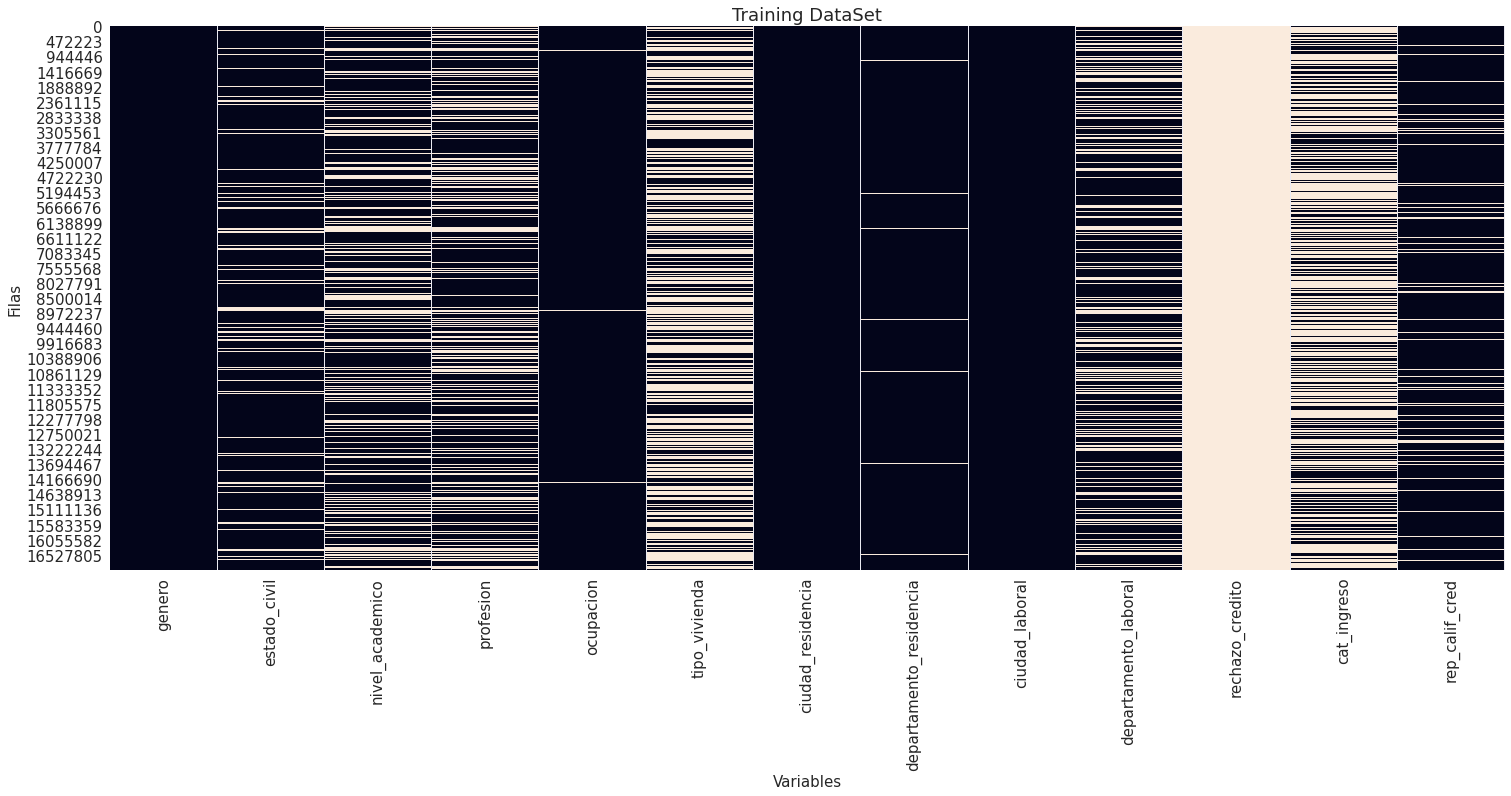

In [38]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25,10))
#indice = np.sort(np.random.random_integers(0,len(df),5000000))
sns.heatmap(df.loc[range(0,17000000),features_o].isnull(), cbar=False)
plt.title("Training DataSet")
plt.xlabel('Variables')
plt.ylabel('Filas')

Text(199.0, 0.5, 'Filas')

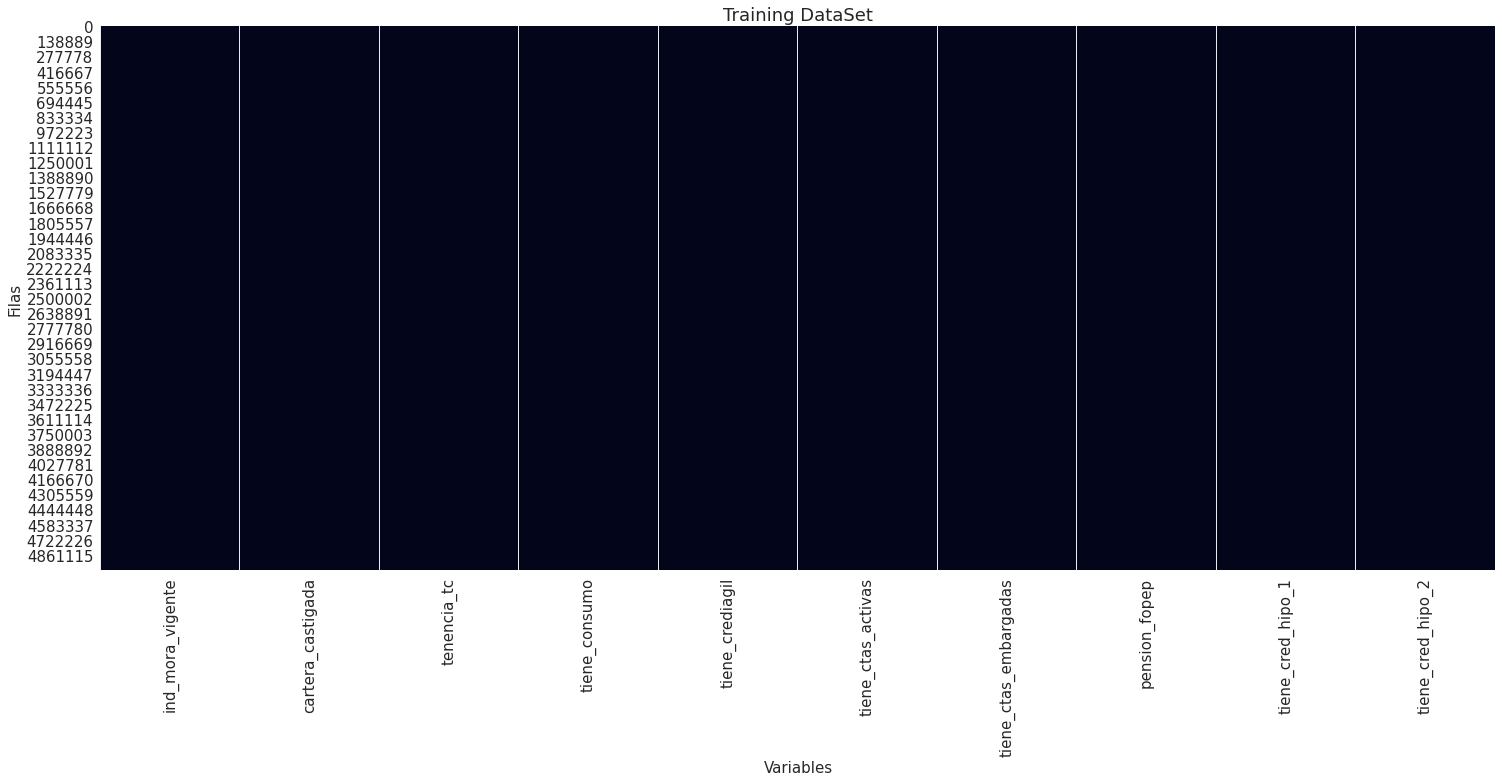

In [39]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25,10))
#indice = np.sort(np.random.random_integers(0,len(df),5000000))
sns.heatmap(df.loc[range(0,5000000),features_b].isnull(), cbar=False)
plt.title("Training DataSet")
plt.xlabel('Variables')
plt.ylabel('Filas')

## Verificación

In [40]:
df['estado_civil'].value_counts()/df.shape[0]*100

SOLTERO        46.286986
CASADO         26.628626
UNION LIBRE    11.500299
DIVORCIADO      4.034775
VIUDO           1.743416
Name: estado_civil, dtype: float64

In [41]:
df['nivel_academico'].value_counts()/df.shape[0]*100

UNIVERSITARIO      35.871431
TECNOLOGO          13.210352
BACHILLER          11.062948
ESPECIALIZACION     7.354956
PRIMARIO            1.379094
NINGUNO             1.036450
Name: nivel_academico, dtype: float64

In [42]:
df['profesion'].value_counts()/df.shape[0]*100

OTROS                                           26.967095
ADMINISTRACION                                   7.183974
CONTADURIA                                       3.159289
NINGUNA                                          3.088228
DERECHO                                          2.462601
                                                  ...    
TECNOLOGIA DEPORTIVA                             0.011389
RELIGIOSA                                        0.011103
JOYERO                                           0.006544
INSPECTORES DE ESTABLECIMIENTOS DE ENSEÑANZA     0.003074
ESPEC EN PROBL DE PERS Y ORIENTA ANAL. PRP       0.002197
Name: profesion, Length: 79, dtype: float64

In [43]:
df['profesion'].unique()

array(['TECNOLOGIA SISTEMAS', 'VETERINARIA', nan, 'OTROS',
       'DISEÑO Y PUBLICIDAD', 'COMUNICACION SOCIAL',
       'INGENIERIA DE PETROLEOS', 'ADMINISTRACION', 'DERECHO',
       'PSICOLOGIA', 'BACTERIOLOGIA', 'INGENIERO METALURGICO',
       'INGENIERO', 'INGENIERIA DE SISTEMAS', 'ODONTOLOGIA',
       'INGENIERIA INDUSTRIAL', 'TECNOLOGIA ELECTRICIDAD', 'CONTADURIA',
       'NINGUNA', 'EDUCACION', 'SACERDOTE', 'QUIMICA FARMACEUTICA',
       'COMERCIO INTERNACIONAL', 'TECNOLOGIA AGROPECUARIA',
       'CONSTRUCCION CIVIL', 'INGENIERIA ADMINISTRATIVA',
       'INGENIERIA CIVIL', 'INGENIERO ELECTRONICO',
       'TECNOLOGIA INDUSTRIAL', 'INGENIERIA AMBIENTAL', 'TRABAJO SOCIAL',
       'TECNOLOGIA EN ADMINISTRACION', 'ECONOMIA', 'INGENIERIA AGRICOLA',
       'AGRONOMIA', 'MERCADOTECNIA', 'TRANSPORTADOR', 'ARQUITECTURA',
       'AUXILIAR CONTABLE', 'ENFERMERIA',
       'DECORADORES Y DISEÑADORES COMERCIALES', 'INGENIERIA ELECTRICA',
       'TECNOLOGIA EN CIENCIAS DE LA SALUD', 'SECRETARIADO

In [44]:
df['ocupacion'].value_counts()/df.shape[0]*100

Empleado                    63.150950
Independiente               16.244569
Estudiante                   6.866289
Jubilado                     4.921666
Desempleado sin Ingresos     2.529233
Comerciante                  2.493824
Otro                         1.314447
Pensionado                   0.956285
Rentista de Capital          0.910131
Desempleado con Ingresos     0.269023
Name: ocupacion, dtype: float64

In [45]:
df['tipo_vivienda'].value_counts()/df.shape[0]*100

FAMILIAR     22.756939
PROPIA       15.844226
ALQUILADA     8.403236
Name: tipo_vivienda, dtype: float64

In [46]:
df['departamento_residencia'].value_counts()/df.shape[0]*100

ANTIOQUIA              32.405545
BOGOTA D.C.            22.344194
VALLE                   8.719908
CUNDINAMARCA            6.415487
ATLANTICO               4.962803
SANTANDER               3.241516
BOLIVAR                 2.823012
RISARALDA               1.956874
CALDAS                  1.455868
NORTE DE SANTANDER      1.439545
TOLIMA                  1.438107
CORDOBA                 1.215248
HUILA                   1.106706
META                    1.106119
MAGDALENA               1.102323
QUINDIO                 0.997349
BOYACA                  0.965124
NARINO                  0.956581
CESAR                   0.870319
CAUCA                   0.833430
ESTADO EXTERIOR         0.584002
SUCRE                   0.576181
CASANARE                0.466927
LA GUAJIRA              0.304774
CAQUETA                 0.190208
SAN ANDRES Y PROVID     0.167424
CHOCO                   0.150136
PUTUMAYO                0.084299
ARAUCA                  0.066704
GUAVIARE                0.049540
AMAZONAS  

In [47]:
df['departamento_laboral'].value_counts()/df.shape[0]*100

ANTIOQUIA              22.656815
BOGOTA D.C.            16.792762
VALLE                   6.022182
CUNDINAMARCA            5.508613
ATLANTICO               3.316384
SANTANDER               2.021475
BOLIVAR                 1.921066
RISARALDA               1.297246
CALDAS                  0.958388
NORTE DE SANTANDER      0.948702
TOLIMA                  0.912105
HUILA                   0.728596
MAGDALENA               0.723382
CORDOBA                 0.711583
META                    0.649714
NARINO                  0.648140
QUINDIO                 0.586531
CAUCA                   0.560761
CESAR                   0.525436
BOYACA                  0.518202
AMAZONAS                0.470443
SUCRE                   0.313333
CASANARE                0.262905
LA GUAJIRA              0.193438
SAN ANDRES Y PROVID     0.132421
CAQUETA                 0.119640
ESTADO EXTERIOR         0.108802
CHOCO                   0.101889
PUTUMAYO                0.048917
ARAUCA                  0.044030
VICHADA   

In [48]:
df['rechazo_credito'].value_counts()/df.shape[0]*100

RECHAZO BIZAGI       0.434032
RECHAZO SUFI         0.089165
RECHAZO BANCO        0.017715
RECHAZO FACTORING    0.001158
Name: rechazo_credito, dtype: float64

In [49]:
df['rep_calif_cred'].value_counts()/df.shape[0]*100

A    19.793362
C    13.772256
B    13.661512
G    11.250834
D    11.229894
H     9.858102
E     7.074238
F     4.002711
Name: rep_calif_cred, dtype: float64

In [50]:
100*df[features_o].isnull().sum()/df.shape[0]

genero                      0.000000
estado_civil                9.805898
nivel_academico            30.084770
profesion                  29.996685
ocupacion                   0.343584
tipo_vivienda              52.995599
ciudad_residencia           0.000000
departamento_residencia     0.941068
ciudad_laboral              0.000000
departamento_laboral       30.116454
rechazo_credito            99.457930
cat_ingreso                59.970991
rep_calif_cred              9.357091
dtype: float64

In [51]:
df.shape

(19255248, 65)

In [52]:
df.to_csv("/mnt/workstation/data/input_CategoricasArregladas.csv")